Foundations of Statistics and Probability for Machine Learning by Janani Ravi
https://app.pluralsight.com/library/courses/foundations-statistics-probability-machine-learning/table-of-contents 
C:\VSProjects\MyProjetcs\jupyter_notebooks - Shortcut  
C:\Users\pb00270\jupyter_notebooks

[Kraggle Dataset: Forbes 2000 Global Companies](https://www.kaggle.com/datasets/rakkesharv/forbes-2000-global-companies)  

In [1]:
import statistics

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

In [6]:
sns.set_theme(style="darkgrid")

In [7]:
forbes_data = pd.read_csv("datasets/forbes.csv")

In [8]:
forbes_data.head()

,Rank,Company,Country,Sales,Profits,Assets,Market Value,Sector,Industry
0,1,ICBC,China,151.4,42.0,3473.2,229.8,Financials,Major Banks
1,2,China Construction Bank,China,134.2,35.0,3016.6,200.5,Financials,Regional Banks
2,3,Berkshire Hathaway,United States,222.9,24.1,620.9,409.9,Financials,Investment Services
3,4,JPMorgan Chase,United States,102.5,24.2,2513.0,306.6,Financials,Major Banks
4,5,Wells Fargo,United States,97.6,21.9,1943.4,274.4,Financials,Major Banks


In [9]:
forbes_data.count()

Rank            2000
Company         2000
Country         2000
Sales           2000
Profits         2000
Assets          2000
Market Value    2000
Sector          1803
Industry        1509
dtype: int64

does this dataset hold any null values?

In [10]:
forbes_data.isnull().sum()

Rank              0
Company           0
Country           0
Sales             0
Profits           0
Assets            0
Market Value      0
Sector          197
Industry        491
dtype: int64

clean up the dataset from the NA values

In [11]:
forbes_data.dropna(inplace=True)

In [12]:
forbes_data.isnull().sum()

Rank            0
Company         0
Country         0
Sales           0
Profits         0
Assets          0
Market Value    0
Sector          0
Industry        0
dtype: int64

In [13]:
forbes_data.count()

Rank            1508
Company         1508
Country         1508
Sales           1508
Profits         1508
Assets          1508
Market Value    1508
Sector          1508
Industry        1508
dtype: int64

In [14]:
forbes_data.shape

(1508, 9)

Compute the Mean Market Value (a measure of central tendency)

In [15]:
mean_market_value = forbes_data["Market Value"].mean()

In [16]:
mean_market_value

26.978494031830238

Compute the Median Market Value (a measure of central tendency: the value at 50th percentile)

In [17]:
median_market_value = forbes_data["Market Value"].median()

In [18]:
median_market_value

13.1

the difference between the median and mean values indicates the impact of outliers in the dataset. 
The larger the difference the larger the effect of outliers.

In [19]:
d_mean_median_market_value = mean_market_value - median_market_value

In [20]:
d_mean_median_market_value

13.878494031830238

the statistics named "mode" is a breakdown of the number of items counted as part of one of the available categorical values. 
In this example the "Sector" feature of the dataset is categorical, therefore it is possible to compute the statistics "mode" on this feature.

In [21]:
forbes_data["Sector"].value_counts()

Sector
Financials                    474
Consumer Discretionary        209
Industrials                   192
Materials                     145
Consumer Staples              106
Information Technology        103
Utilities                      86
Energy                         79
Health Care                    71
Telecommunication Services     43
Name: count, dtype: int64

In [22]:
mode_sector = forbes_data["Sector"].mode()

In [23]:
mode_sector

0    Financials
Name: Sector, dtype: object

visualize data with a Box Plot

In [24]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

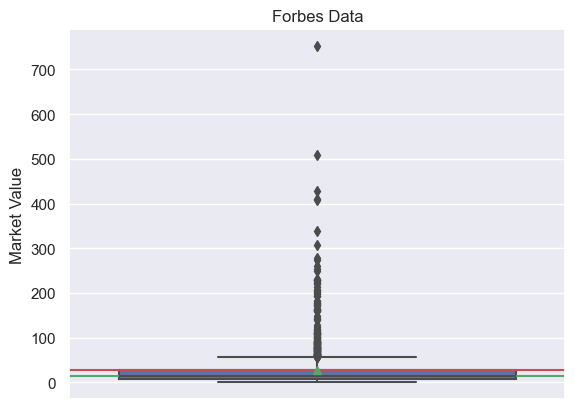

In [25]:
sns.boxplot(data=forbes_data, y='Market Value', showmeans=True)

plt.axhline(y=mean_market_value, color='r', linestyle='-')
plt.axhline(y=median_market_value, color='g', linestyle='-')
plt.title('Forbes Data')
plt.show()

a better representation of the box plot

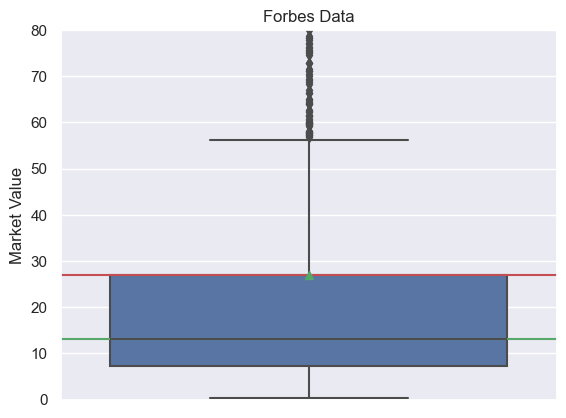

In [26]:
sns.boxplot(data=forbes_data, y='Market Value', showmeans=True)

plt.ylim(0,80)

plt.axhline(y=mean_market_value, color='r', linestyle='-')
plt.axhline(y=median_market_value, color='g', linestyle='-')
plt.title('Forbes Data')
plt.show()

The green line at the centre of the box is the MEDIAN.
The distance between the top and bottom of the box is the INTERQUARTILE RANGE.
The IQR is the range whose upper bound is the 75th%-tile above and the lower bound is the 25%th-tile.
The IQR is NOT very sensitive to the presence of outliers.

The black whiskers in the plot are positioned at: 
[(1.5)*IQR + 75th%-tile] 
[(1.5)*IQR + 25th%-tile] 

datapoints that lie above or below these whiskers are usually considered outliers.

In [32]:
max_profit = forbes_data['Profits'].max()
max_profit

45.2

In [33]:
min_profit = forbes_data['Profits'].min()
min_profit

-13.0

In [34]:
range_profit = max_profit - min_profit
range_profit

58.2

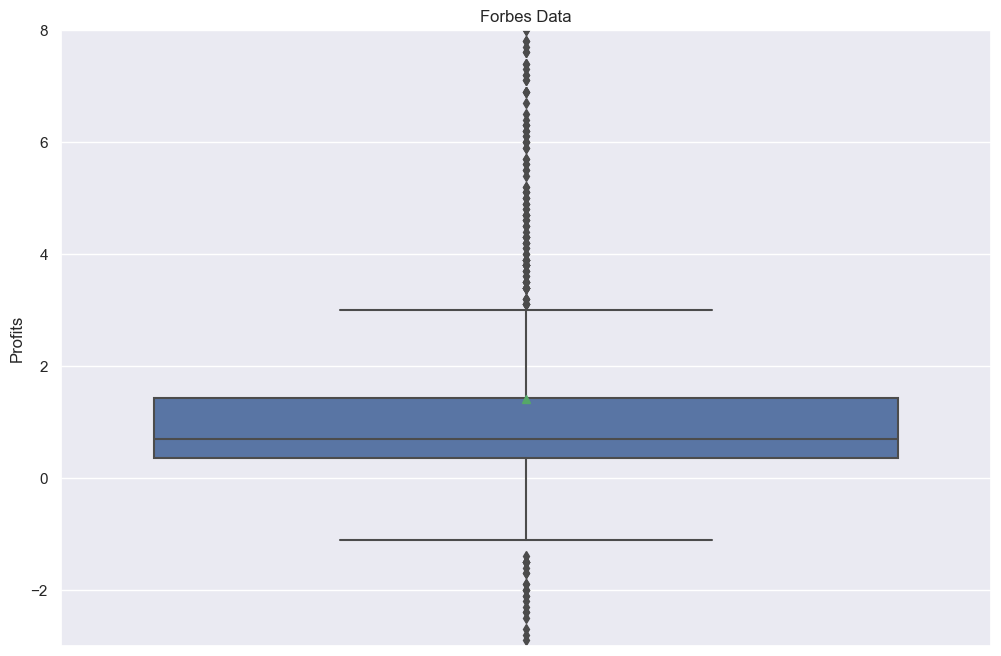

In [41]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=forbes_data, y='Profits', showmeans=True)
plt.ylim(-3,8)
plt.title('Forbes Data')
plt.show()

In [42]:
# the 25th quantile
Q1 = np.quantile(forbes_data['Profits'],0.25)
Q1

0.34975

In [44]:
# the 75th quantile
Q3 = np.quantile(forbes_data['Profits'],0.75)
Q3

1.4249999999999998

In [46]:
# The interquartile range IQR is a measure of dispersion 
IQR = Q3-Q1
IQR

1.0752499999999998

In [47]:
# The data range is also a measure of dispersion
# the presence of outliers causes a large difference between the IQR and the DATA RANGE
range_profit

58.2

In [48]:
# STD DEVIATION is a measure of dispersion: std_dev = (Sum[(xi-mean)^2] / N ) ^ (1/2)
std_dev_profits = forbes_data['Profits'].std()
std_dev_profits

3.244201278603241

In [50]:
# The VARIANCE of a variable is computed from teh STD DEV => VARIANCE = STD_DEV ^ 2
variance_profits = std_dev_profits **2
variance_profits

10.524841936090903

In [51]:
variance_profits = forbes_data['Profits'].var()
variance_profits

10.524841936090901

In [52]:
# the DESCRIBE function quickly produces a summary of the statistics for each the numerical columns of a dataset
forbes_data.describe()

,Rank,Sales,Profits,Assets,Market Value
count,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000
mean,909.135279,19.623046,1.407430,97.647016,26.978494
std,554.044456,30.875809,3.244201,287.036157,47.099541
min,1.000000,0.001000,-13.000000,1.300000,0.240000
25%,433.750000,4.900000,0.349750,12.800000,7.300000
50%,883.500000,10.300000,0.692500,25.900000,13.100000
75%,1354.250000,19.900000,1.425000,60.325000,26.900000
max,1999.000000,485.300000,45.200000,3473.200000,752.000000
